# 시계열 분석
## 시계열 분해

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

passengers = pd.read_csv("../contents/AirPassengers.csv", parse_dates=[0], index_col=0)
passengers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [133]:
passengers.info()  # 단별량 데이터

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [134]:
passengers = pd.read_csv("../contents/AirPassengers.csv", parse_dates=[0], index_col=0)
passengers

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

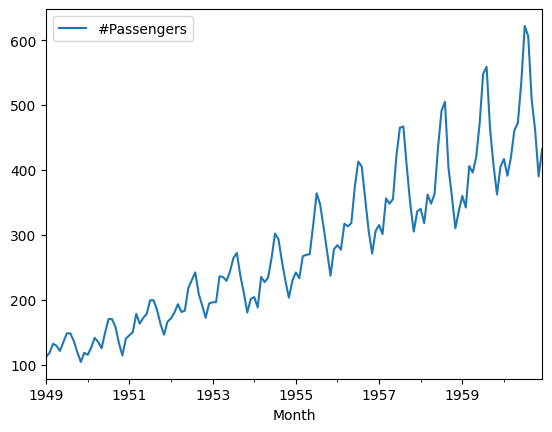

In [135]:
passengers.plot()

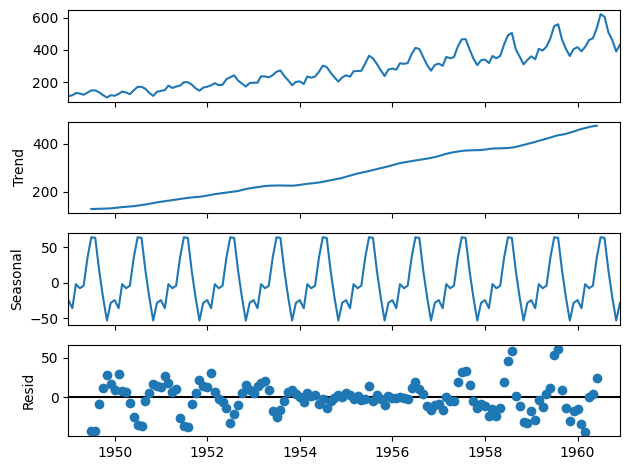

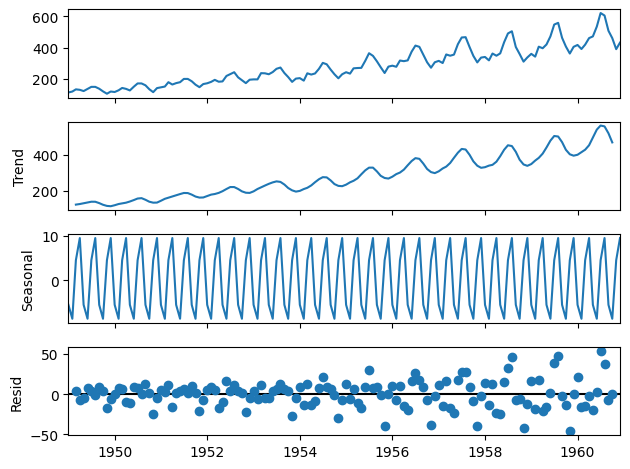

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec = seasonal_decompose(passengers, model="additive", period=12)  # period 12 : 월별
dec.plot()
plt.show()

dec2 = seasonal_decompose(passengers, model="additive", period=4)  # period 4 : 분기별
dec2.plot()
plt.show()

# Resid 지표가 정상성을 보임 (AR - 오토 회귀 가능)

In [137]:
print(dec.trend[10:20])
print(dec.seasonal[10:20])
print(dec.resid[10:20])

Month
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
1950-04-01    136.416667
1950-05-01    137.416667
1950-06-01    138.750000
1950-07-01    140.916667
1950-08-01    143.166667
Name: trend, dtype: float64
Month
1949-11-01   -53.593434
1949-12-01   -28.619949
1950-01-01   -24.748737
1950-02-01   -36.188131
1950-03-01    -2.241162
1950-04-01    -8.036616
1950-05-01    -4.506313
1950-06-01    35.402778
1950-07-01    63.830808
1950-08-01    62.823232
Name: seasonal, dtype: float64
Month
1949-11-01    28.593434
1949-12-01    16.869949
1950-01-01     8.498737
1950-02-01    29.104798
1950-03-01     8.324495
1950-04-01     6.619949
1950-05-01    -7.910354
1950-06-01   -25.152778
1950-07-01   -34.747475
1950-08-01   -35.989899
Name: resid, dtype: float64


# 정상성 검정과 차분

In [138]:
# 정상성 검정
from statsmodels.tsa.stattools import adfuller


def adf_test(x):
    stat, p_value, _, _, _, _ = adfuller(x)
    print("p_value:", p_value)
    if p_value <= 0.005:
        print("유의 수준 0.05 이하로 판단하여 이 데이터는 정상성입니다.")
    else:
        print("유의 수준 0.05 초과로 판단하여 이 데이터는 정상성이 아닙니다.")
    return p_value


adf_test(passengers)

p_value: 0.991880243437641
유의 수준 0.05 초과로 판단하여 이 데이터는 정상성이 아닙니다.


0.991880243437641

<Axes: xlabel='Month'>

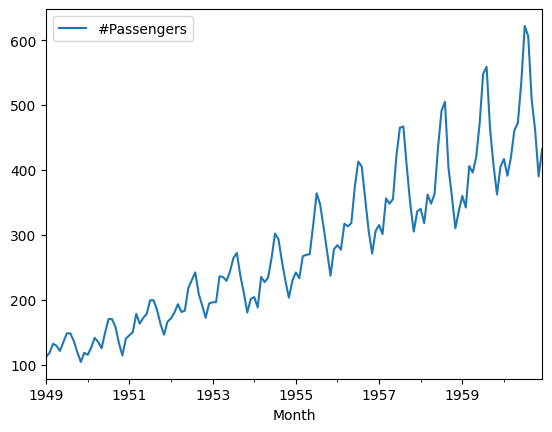

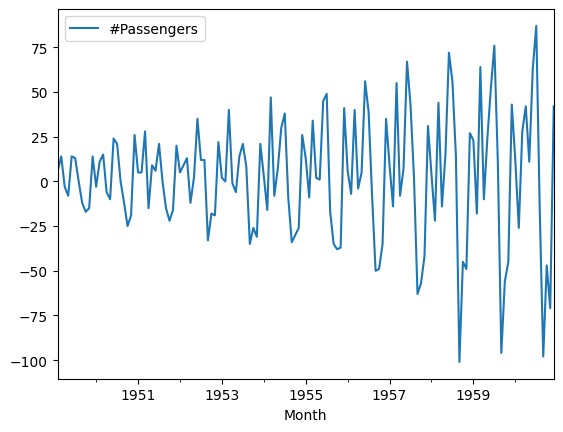

In [139]:
# 차분
diff_passengers = passengers.copy()
diff_passengers = diff_passengers.diff()
diff_passengers.dropna(inplace=True)
passengers.plot()
diff_passengers.plot()

p_value: 0.0542132902838255
유의 수준 0.05 초과로 판단하여 이 데이터는 정상성이 아닙니다.
p_value: 2.7328918500142407e-29
유의 수준 0.05 이하로 판단하여 이 데이터는 정상성입니다.


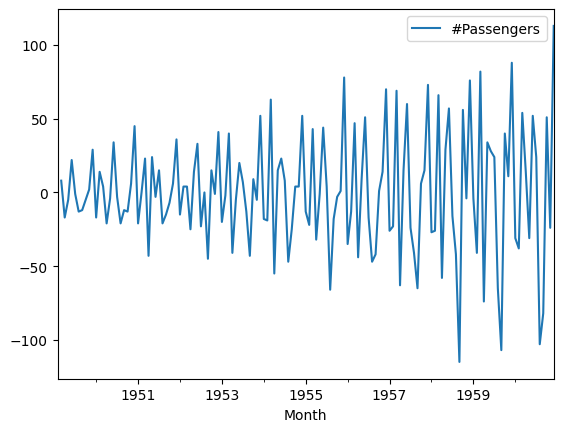

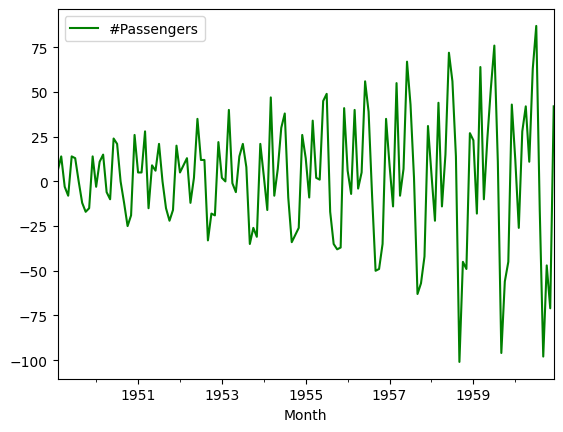

In [140]:
adf_test(diff_passengers)
adf_test(diff_passengers.diff().dropna())
diff_passengers.diff().plot()
diff_passengers.plot(color="green")
plt.show()

<Axes: xlabel='Month'>

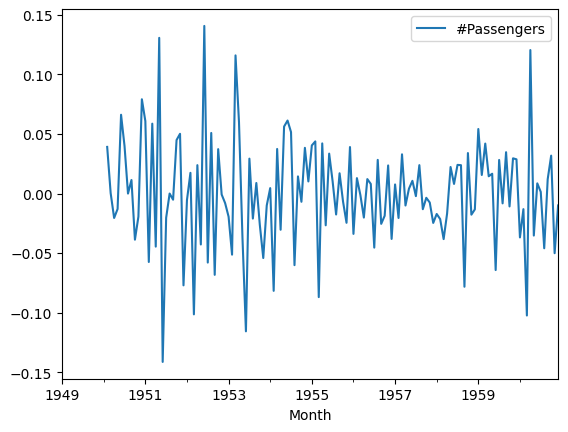

In [141]:
np.log(passengers).diff().diff(12).plot()  #계절성 제거

In [142]:
adf_test(np.log(passengers).diff().diff(12).dropna())

p_value: 0.00024859123113840924
유의 수준 0.05 이하로 판단하여 이 데이터는 정상성입니다.


0.00024859123113840924

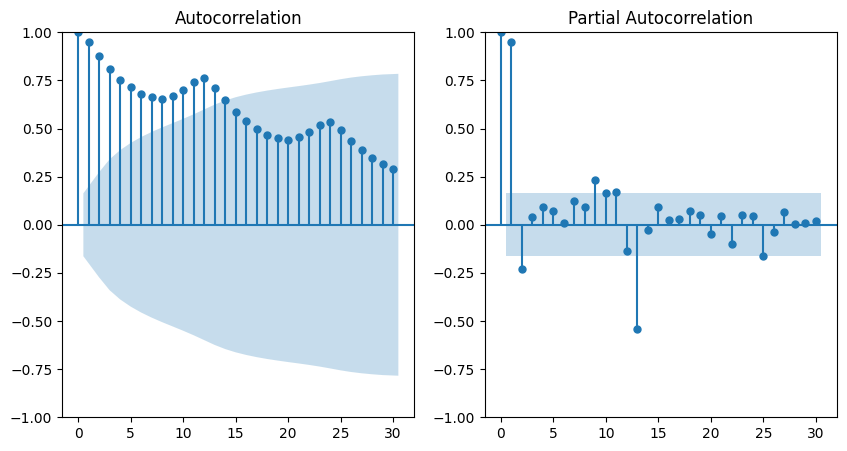

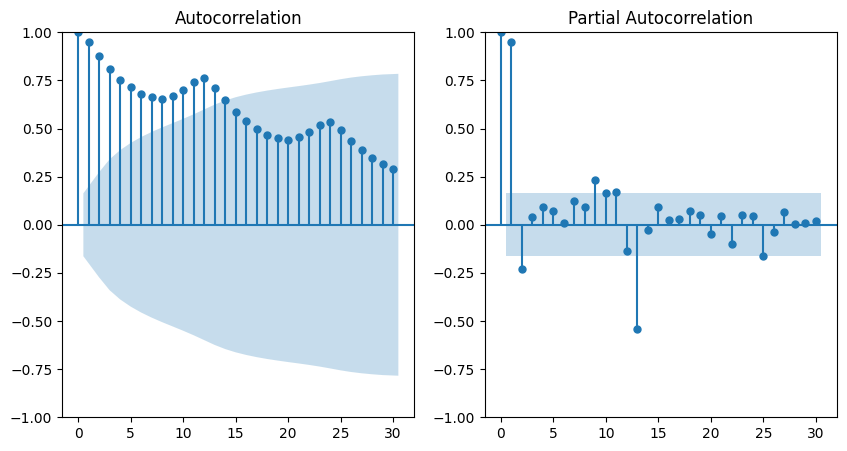

In [157]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# 자기상관함수(Autocorrelation Fucntion, ACF)
plot_acf(passengers.squeeze(), lags=30, ax=ax[0])  # squeeze = dataframe을 1차원으로 변경

# 편자기상관함수(Partial Autocorrelation Fucntion, PACF)
plot_pacf(passengers.squeeze(), lags=30, ax=ax[1])

In [158]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(passengers, shuffle=False, test_size=0.2)

In [159]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train.values, order=(2, 1, 0))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -529.821
Date:                Thu, 07 Dec 2023   AIC                           1065.642
Time:                        13:54:57   BIC                           1073.851
Sample:                             0   HQIC                          1068.974
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3422      0.091      3.776      0.000       0.165       0.520
ar.L2         -0.2121      0.103     -2.057      0.040      -0.414      -0.010
sigma2       636.3147     91.372      6.964      0.000     457.229     815.401
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.65
Prob(Q):                              0.89   Prob(JB):                         0.16
Heteroskedasticity (H):               6.13   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [160]:
import itertools

p = range(4)
d = range(4)
q = range(4)
pdq = list(itertools.product(p, d, q))
#pdq
aic_list = []
for i in pdq:
    model = ARIMA(train.values, order=i)
    fit = model.fit()
    aic_list.append((i, fit.aic))
    print(i, round(fit.aic, 3))

(0, 0, 0) 1367.727
(0, 0, 1) 1232.917
(0, 0, 2) 1178.065


C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 0, 3) 1113.462
(0, 1, 0) 1076.271
(0, 1, 1) 1063.646
(0, 1, 2) 1060.685
(0, 1, 3) 1062.466
(0, 2, 0) 1105.708
(0, 2, 1) 1072.849
(0, 2, 2) 1060.346
(0, 2, 3) 1057.373
(0, 3, 0) 1198.453
(0, 3, 1) 1103.636
(0, 3, 2) 1076.269
(0, 3, 3) 1062.942
(1, 0, 0) 1092.214
(1, 0, 1) 1078.074
(1, 0, 2) 1076.299
(1, 0, 3) 1077.491
(1, 1, 0) 1068.536
(1, 1, 1) 1058.246
(1, 1, 2) 1057.328
(1, 1, 3) 1058.949
(1, 2, 0) 1101.096
(1, 2, 1) 1065.177
(1, 2, 2) 1054.889
(1, 2, 3) 1056.058
(1, 3, 0) 1169.494
(1, 3, 1) 1099.483
(1, 3, 2) 1100.846
(1, 3, 3) 1060.364
(2, 0, 0) 1083.134
(2, 0, 1) 1073.81


C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(2, 0, 2) 1074.541
(2, 0, 3) 1075.435
(2, 1, 0) 1065.642
(2, 1, 1) 1058.648
(2, 1, 2) 1057.516
(2, 1, 3) 1056.58
(2, 2, 0) 1089.689
(2, 2, 1) 1062.393
(2, 2, 2) 1056.169
(2, 2, 3) 1058.058
(2, 3, 0) 1133.464
(2, 3, 1) 1088.747
(2, 3, 2) 1086.525
(2, 3, 3) 1061.733
(3, 0, 0) 1081.139
(3, 0, 1) 1074.698
(3, 0, 2) 1076.614
(3, 0, 3) 1073.081
(3, 1, 0) 1067.589
(3, 1, 1) 1061.026
(3, 1, 2) 1053.344


C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 3) 1028.861
(3, 2, 0) 1091.466
(3, 2, 1) 1064.346
(3, 2, 2) 1057.706
(3, 2, 3) 1060.116
(3, 3, 0) 1133.676
(3, 3, 1) 1090.603
(3, 3, 2) 1085.572
(3, 3, 3) 1061.299


In [161]:
best_param = sorted(aic_list, key=lambda x: x[1])[0][0]  # aic가 가장 낮은 pdq 가져오기
model = ARIMA(train.values, order=best_param)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -507.430
Date:                Thu, 07 Dec 2023   AIC                           1028.861
Time:                        13:55:03   BIC                           1048.014
Sample:                             0   HQIC                          1036.634
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9585      0.095     10.077      0.000       0.772       1.145
ar.L2          0.2874      0.140      2.048      0.041       0.012       0.562
ar.L3         -0.6639      0.091     -7.306      0.000      -0.842      -0.486
ma.L1         -0.8932     65.545     -0.014      0.989    -129.358     127.572
ma.L2         -0.8949    123.954     -0.007      0.994    -243.840     242.051
ma.L3          0.9983     65.289      0.015      0.988    -126.966     128.963
sigma2       392.2725   2.56e+04      0.015      0.988   -4.99e+04    5.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.51   Prob(JB):                         0.29
Heteroskedasticity (H):               5.08   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
prediction = fit.forecast(len(test))
prediction

array([484.58124725, 450.2263723 , 410.51303138, 366.8379033 ,
       336.37207778, 320.98562817, 326.47838944, 347.54700244,
       379.53370057, 412.59969268, 439.49721226, 453.54432875,
       452.78567304, 438.2385335 , 414.75204062, 388.56436075,
       366.37268799, 353.16944935, 351.52288469, 360.8830963 ,
       378.14669497, 398.47617105, 416.70819897, 428.56404547,
       431.67044457, 425.950956  , 413.49087291, 397.8424664 ,
       383.06045307])

In [163]:
from sklearn.metrics import r2_score, mean_absolute_error

print(r2_score(test, prediction))
print(mean_absolute_error(test, prediction))

0.13798597640044874
56.3295425362452


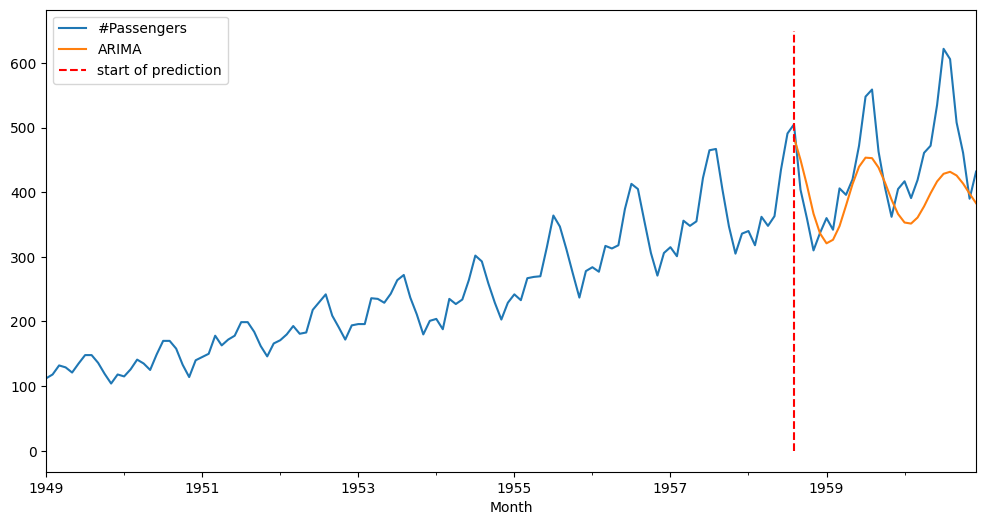

In [164]:
prediction_df=pd.DataFrame(prediction, index=test.index, columns=["ARIMA"])
fig, ax=plt.subplots(figsize=(12,6))
passengers.plot(ax=ax)
prediction_df.plot(ax=ax)
ax.vlines(test.index[0], 0, 650,linestyle="--", color="r", label="start of prediction")
ax.legend()
plt.show()